# Laplace Mechanism

## Libraries

In [2]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import laplace

## Contextualization

In [3]:
"""
-------------
| Dataset X |
--------------------------
| User         Has HIV   |
--------------------------
| Andrew       False     |
| Bob          True      |
| Carly        True      |
| Dean         True      |
| Ernest       False     |
| Florence     False     |
--------------------------

Assume the function F as a count query, where:

F = number of individuals which hold HIV

Then, F(X) = 3

Now, the neighbouring Dataset Y can be generated either from:
    1. Dataset X added in another user such {Gary:False} or {Harry:True}
    2. Dataset X removed in one existing user such {Andrew:False} or {Bob:True}
    3. Dataset X modified in one existing user such {Andrew:False} to {Andrew:True} or {Andrew:False} to {Andy:False}

Thus, F(Y) can assume values 2, 3 or 4 depending on Y's generation pattern
"""

# Response of function F applied to dataset X
fx = 3

# Responses of function F applied to the possible datasets Y
fy = [2, 3, 4]

# Sensitivity of a count query (always equals to one)
delta_f = 1

# Standard epsilon values in order of magnitude -- lower to higher
eps = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]

# Mean of the Laplace distribution (always equals to zero)
laplace_mean = 0.0

## Proofs

In [4]:
"""
Presentation of some proofs from the differential privacy model
"""

print("Sensitivity (Query Function) = {}".format(delta_f))

for i_fy in fy:
    print("\nF(X) = {}\nF(Y) = {}".format(fx, i_fy))
    
    for j_eps in eps:
        # Sampling noise from the Laplace distribution with zero mean and (sensitivity/epsilon) scale
        noise = laplace.rvs(loc=laplace_mean, scale=delta_f/j_eps, size=1)[0]
        
        # Generate one possible z output from the sum of fx + noise
        z = fx + noise
        
        # Calculate the probability of occurrence of the output z in datasets X and Y, respectively
        fx_prob = laplace.pdf(x=z, loc=fx, scale=delta_f/j_eps)
        fy_prob = laplace.pdf(x=z, loc=i_fy, scale=delta_f/j_eps)
        
        print("\n\tEpsilon = {}\n".format(j_eps))
        
        print("\t\tNoise = {}\n\t\tz (F(X) + noise) = {}\n".format(round(noise, 2), round(z, 2)))
        
        print("\t\tProb(Fx(z)) = {} %\n\t\tProb(Fy(z)) = {} %".format(round(fx_prob, 5), round(fy_prob, 5)))
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) = {}\n".format(round((fx_prob/fy_prob), 5)))
        
        print("\t\tExp(epsilon) = {}\n\t\tExp(-epsilon) = {}\n".format(round(math.exp(j_eps), 5), round(math.exp(-j_eps), 5)))
        
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?")
        print("\t\t{} <= {} ?\n\t\t{}\n".format(round((fx_prob/fy_prob), 5), round(math.exp(j_eps), 5), (round((fx_prob/fy_prob), 5) <= round(math.exp(j_eps), 5))))
        
        print("\t\tProb(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?")
        print("\t\t{} >= {} ?\n\t\t{}".format(round((fx_prob/fy_prob), 5), round(math.exp(-j_eps), 5), (round((fx_prob/fy_prob), 5) >= round(math.exp(-j_eps), 5))))
        

Sensitivity (Query Function) = 1

F(X) = 3
F(Y) = 2

	Epsilon = 0.01

		Noise = -16.73
		z (F(X) + noise) = -13.73

		Prob(Fx(z)) = 0.00423 %
		Prob(Fy(z)) = 0.00427 %
		Prob(Fx(z)) / Prob(Fy(z)) = 0.99005

		Exp(epsilon) = 1.01005
		Exp(-epsilon) = 0.99005

		Prob(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?
		0.99005 <= 1.01005 ?
		True

		Prob(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?
		0.99005 >= 0.99005 ?
		True

	Epsilon = 0.1

		Noise = 0.77
		z (F(X) + noise) = 3.77

		Prob(Fx(z)) = 0.04628 %
		Prob(Fy(z)) = 0.04188 %
		Prob(Fx(z)) / Prob(Fy(z)) = 1.10517

		Exp(epsilon) = 1.10517
		Exp(-epsilon) = 0.90484

		Prob(Fx(z)) / Prob(Fy(z)) <= Exp(epsilon) ?
		1.10517 <= 1.10517 ?
		True

		Prob(Fx(z)) / Prob(Fy(z)) >= Exp(-epsilon) ?
		1.10517 >= 0.90484 ?
		True

	Epsilon = 0.5

		Noise = -1.08
		z (F(X) + noise) = 1.92

		Prob(Fx(z)) = 0.14587 %
		Prob(Fy(z)) = 0.24049 %
		Prob(Fx(z)) / Prob(Fy(z)) = 0.60653

		Exp(epsilon) = 1.64872
		Exp(-epsilon) = 0.60653

		Prob(Fx(z)) / Prob(Fy(z)) 

## Histrograms

# of Samples = 200

Sensitivity (Query Function) = 1

- Eps = 0.01


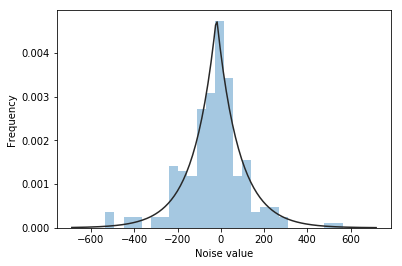


- Eps = 0.1


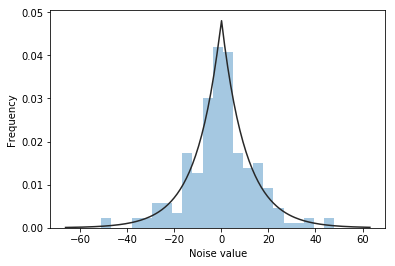


- Eps = 0.5


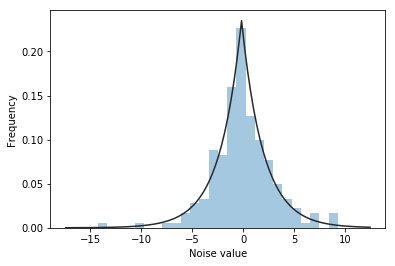


- Eps = 1.0


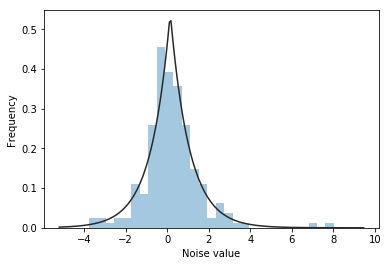


- Eps = 2.0


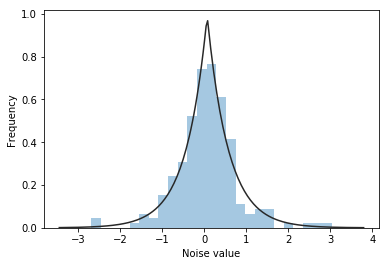


- Eps = 3.0


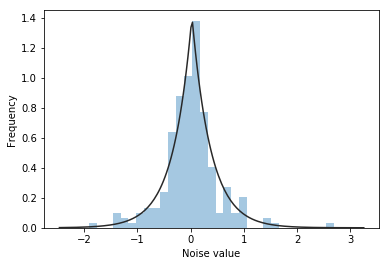

In [5]:
"""
In this example, we want to plot histrograms

The histograms focus on displaying the outcomes frequency to check if they match with its
expected distribution

We expect that it looks like the Laplace distribution

We set an amount of 200 samples to generate the histograms

Each histograms are generated using a different value for eps
"""

number_of_samples = 200

print("# of Samples = {}\n\nSensitivity (Query Function) = {}".format(number_of_samples, delta_f))

for i_eps in eps:
    print("\n- Eps = {}".format(i_eps))
    
    samples = laplace.rvs(loc=laplace_mean, scale=delta_f/i_eps, size=number_of_samples)
    
    sns.distplot(samples, fit=laplace, kde=False)
    
    plt.xlabel("Noise value")
    plt.ylabel("Frequency")
    plt.show()
